In [ ]:
import os, sys
p = os.path.abspath('../')
sys.path.insert(1, p)

from criminologia_cdmx.etl import *
from criminologia_cdmx.patrones_espacio_temporales import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploración de patrones espacio temporales

## Estimaciones con KDE

Aquí vamos a seguir la metodología propuesta en el artículo [_Mapping spatiotemporal patterns of events using social media: a case study of influenza trends_ ](https://doi.org/10.1080/13658816.2017.1406943) para trazar la evolución espacio-temporal de una categoría con respecto a las demás.

La idea general es tener medidas normalizadas de una categoría de eventos y compararla en cada momento con el promedio de esa medida durante todo el periodo, de esa forma tenemos mapas de la _intensidad_ de esa categoría con respecto a las demás. Después, se calculan mapas de p-values para estimar qué tan significativos son los valores encontrados

### Leemos datos y fijamos fechas de análisis

Las fechas definen los intervalos de análisis (la frecuencia con la que se agregan los datos para calcular los KDE); la fecha inicial y la final definen el periodo mase con respecto al que se calculan medias y desviaciones estándar

In [ ]:
carpetas = get_carpetas_desde_archivo("../datos/descargas/carpetas_fiscalia.csv")
carpetas = agregar_categorias_de_usuario(carpetas, archivo_categorias="../datos/categorias_incidentes.csv")
fechas = pd.date_range(start='1/1/2019', end='1/1/2020', freq='M').to_list()

/tmp/ipykernel_17397/2419804332.py:1: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  carpetas = get_carpetas_desde_archivo("../datos/descargas/carpetas_fiscalia.csv")


## Serie de razones de eventos

Primero obtenemos las series de kdes para el evento de interés y para todos los eventos: 

In [ ]:
xx, yy, kdes_categoria = serie_tiempo_kde_categoria(carpetas, fechas, ['Homicidios dolosos'], "30 days", bw=0.01)
categorias_todas = list(carpetas[carpetas.categoria.notnull()]['categoria'].unique())
xx, yy, kdes_base = serie_tiempo_kde_categoria(carpetas, fechas, categorias_todas, "30 days", bw=0.01)

In [ ]:
razon_1 = np.divide(np.round(kdes_categoria[5], 5), np.round(kdes_base[5], 5), out=np.zeros_like(kdes_base[5], dtype=float), where=np.round(kdes_base[5], 5) != 0)

In [ ]:
razon_1 = np.divide(np.round(kdes_categoria[1], 1), np.round(kdes_base[1], 5), where=kdes_base[1] != 0)

/tmp/ipykernel_17397/3865410521.py:1: RuntimeWarning: divide by zero encountered in true_divide
  razon_1 = np.divide(np.round(kdes_categoria[1], 5), np.round(kdes_base[1], 5), where=kdes_base[1] != 0)
/tmp/ipykernel_17397/3865410521.py:1: RuntimeWarning: invalid value encountered in true_divide
  razon_1 = np.divide(np.round(kdes_categoria[1], 5), np.round(kdes_base[1], 5), where=kdes_base[1] != 0)


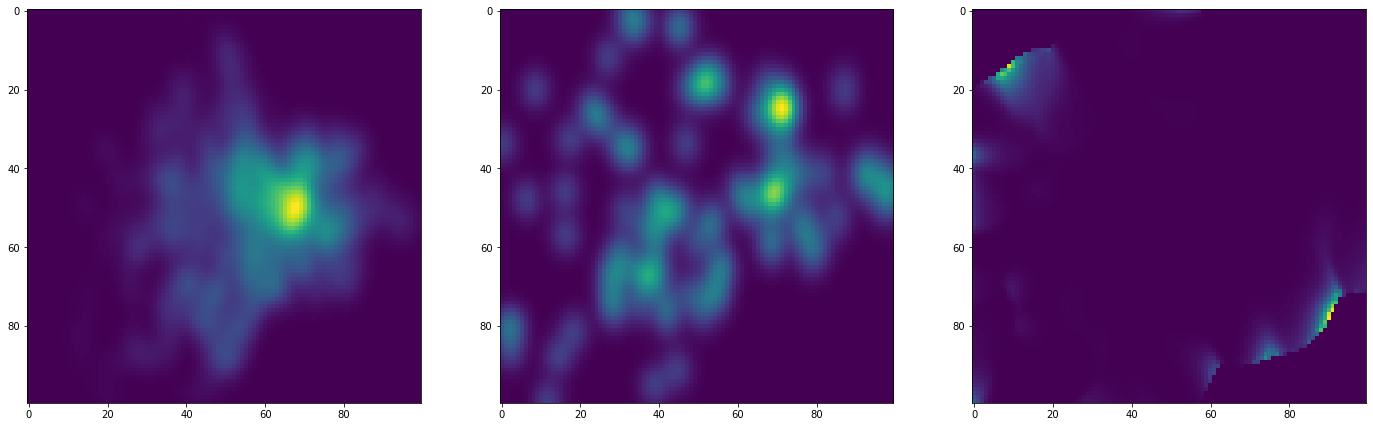

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24, 10))
ax1.imshow(kdes_base[1])
ax2.imshow(kdes_categoria[1])
ax3.imshow(razon_1)

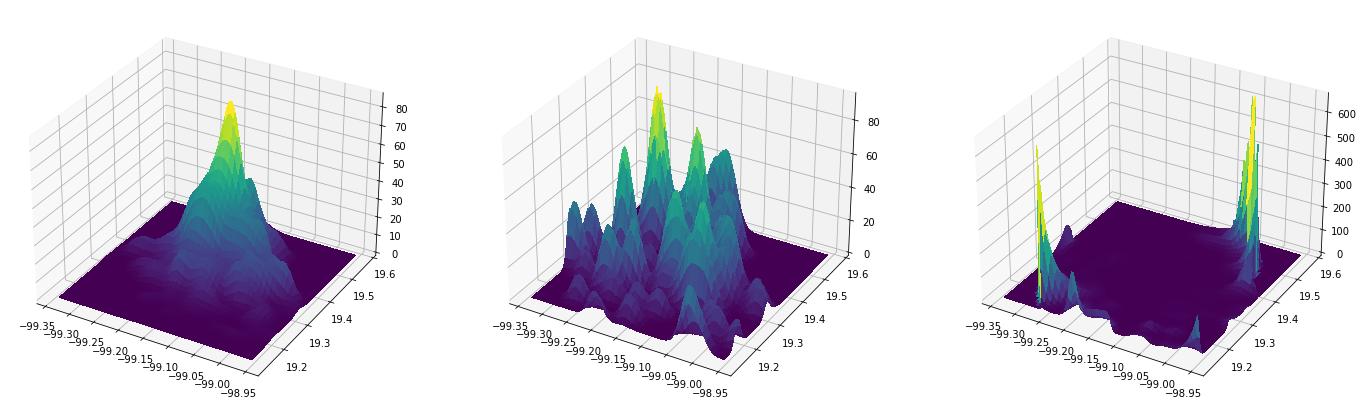

In [ ]:
fig = plt.figure(figsize=(24, 10))

ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(xx, yy, kdes_base[1],cmap='viridis', edgecolor='none', antialiased=False)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(xx, yy, kdes_categoria[1],cmap='viridis', edgecolor='none', antialiased=False)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(xx, yy, razon_1,cmap='viridis', edgecolor='none', antialiased=False)
plt.show()

In [ ]:
razones, intensidades = serie_mapas_intensidad(carpetas, fechas, 'Homicidios dolosos', "30 days", bw=0.01)

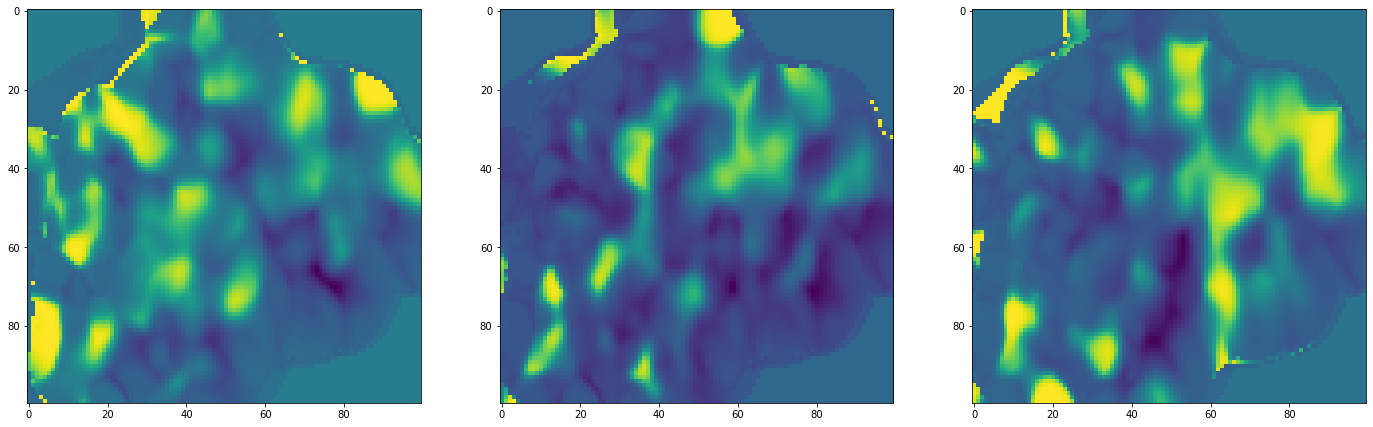

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24, 10))
ax1.imshow(intensidades[1])
ax2.imshow(intensidades[3])
ax3.imshow(intensidades[6])

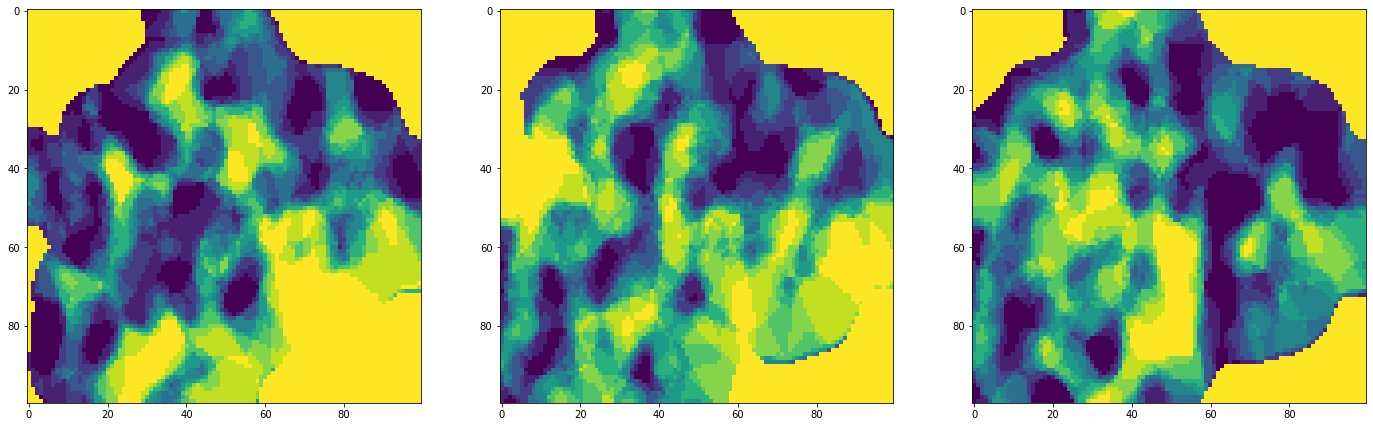

In [ ]:
p_values = p_value_maps(razones)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24, 10))
ax1.imshow(p_values[1])
ax2.imshow(p_values[3])
ax3.imshow(p_values[6])

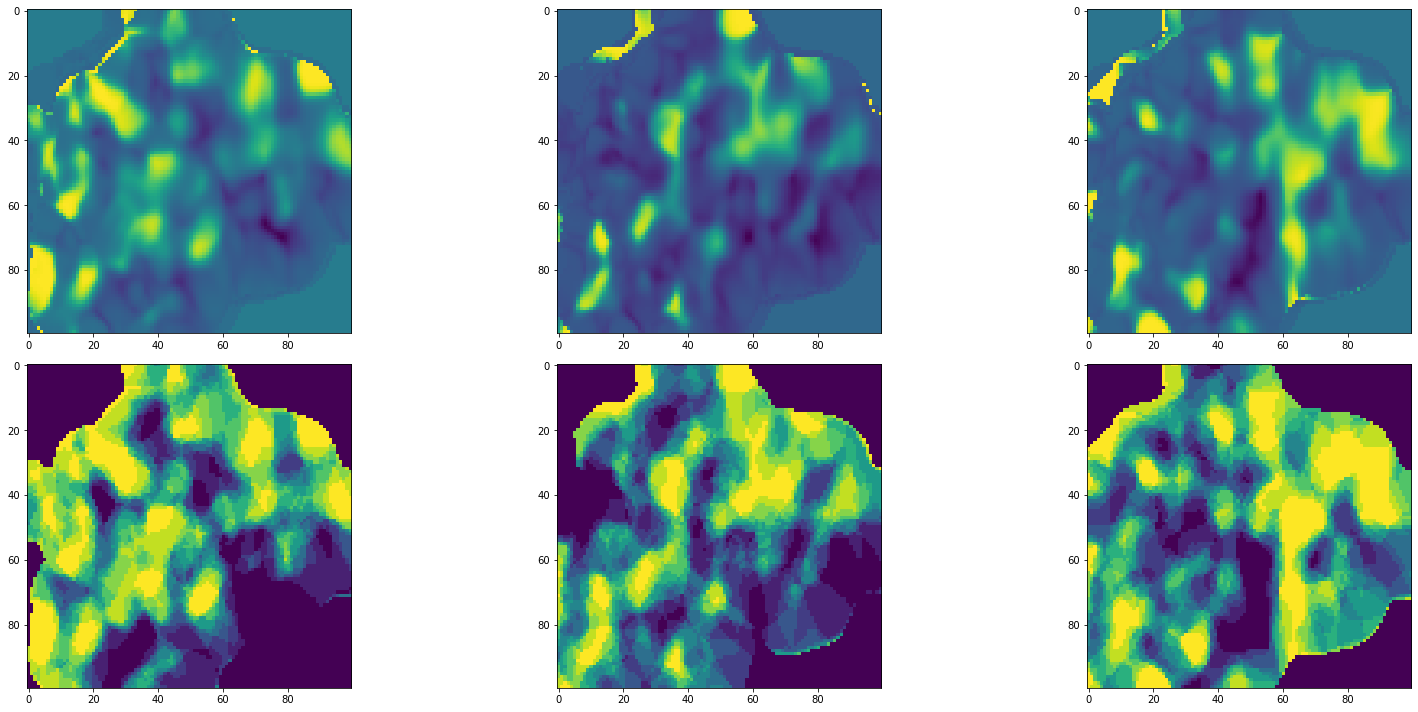

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(24, 10))
axes = axes.ravel()
axes[0].imshow(intensidades[1])
axes[1].imshow(intensidades[3])
axes[2].imshow(intensidades[6])
axes[3].imshow(p_values[1], cmap='viridis_r')
axes[4].imshow(p_values[3], cmap='viridis_r')
axes[5].imshow(p_values[6], cmap='viridis_r')
plt.tight_layout()

In [ ]:
p_values[1]

array([[2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       ...,
       [2.        , 2.        , 1.16666667, ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

In [ ]:
intensidades[6].shape

(100, 100)

In [ ]:
l = [1,2,3]
l.remove(2)
l

[1, 3]

In [ ]:
l 